<a href="https://colab.research.google.com/github/nikhil1728/Nikhil-DA-/blob/main/Project_using_Probability_and_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
fitness_company = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749')

In [ ]:
fitness_company

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [ ]:
categorical_columns = ['Product', 'Age', "Gender", 'MaritalStatus', "Usage",'Fitness']
for i in categorical_columns:
  categorical_value_counts = fitness_company[i].value_counts()
  print(categorical_value_counts)
  print('\n'*3)

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64




Age
25    25
23    18
24    12
26    12
28     9
33     8
35     8
22     7
30     7
27     7
38     7
21     7
31     6
34     6
29     6
20     5
40     5
19     4
32     4
37     2
45     2
48     2
47     2
18     1
41     1
39     1
36     1
43     1
46     1
44     1
50     1
42     1
Name: count, dtype: int64




Gender
Male      104
Female     76
Name: count, dtype: int64




MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64




Usage
3    69
4    52
2    33
5    17
6     7
7     2
Name: count, dtype: int64




Fitness
3    97
5    31
2    26
4    24
1     2
Name: count, dtype: int64






In [ ]:
fitness_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
fitness_company.isnull().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


Given fitness_company data set has no null values.

In [ ]:
fitness_company.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
fitness_company.sort_values(by = ['Miles','Age'], ascending = False).head(20)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
173,KP781,35,Male,16,Partnered,4,5,92131,360
166,KP781,29,Male,14,Partnered,7,5,85906,300
167,KP781,30,Female,16,Partnered,6,5,90886,280
170,KP781,31,Male,16,Partnered,6,5,89641,260
155,KP781,25,Male,18,Partnered,6,5,75946,240
84,KP481,21,Female,14,Partnered,5,4,34110,212
176,KP781,42,Male,18,Single,5,4,89641,200
175,KP781,40,Male,21,Single,6,5,83416,200
171,KP781,33,Female,18,Partnered,4,5,95866,200
152,KP781,25,Female,18,Partnered,5,5,61006,200


Maximum number of customers who covers more miles per week are have age in between 20-35 and marital status as partnere  and fitness rating as either 4 or 5.

In [ ]:
columns = ['Product', 'Age', 'Gender', 'MaritalStatus', 'Usage','Fitness','Income','Miles']
for i in columns:
  print(i,"_shape", "=", fitness_company[i].shape)

Product _shape = (180,)
Age _shape = (180,)
Gender _shape = (180,)
MaritalStatus _shape = (180,)
Usage _shape = (180,)
Fitness _shape = (180,)
Income _shape = (180,)
Miles _shape = (180,)


In [ ]:
data_to_describe = ['Usage','Fitness']
for i in data_to_describe:
  print(i,'_describe_method')
  print(fitness_company[i].describe())
  print('\n'*3)

Usage _describe_method
count    180.000000
mean       3.455556
std        1.084797
min        2.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        7.000000
Name: Usage, dtype: float64




Fitness _describe_method
count    180.000000
mean       3.311111
std        0.958869
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Fitness, dtype: float64






In [ ]:
median_data = ['Usage','Fitness']
for i in median_data:
  print(i,"_median",'=',np.median(fitness_company[i]))

Usage _median = 3.0
Fitness _median = 3.0


Usage median is 3 which says that average number of times customer use their own product is 3 times a week and self rated themselves as 3 by fitness_median.

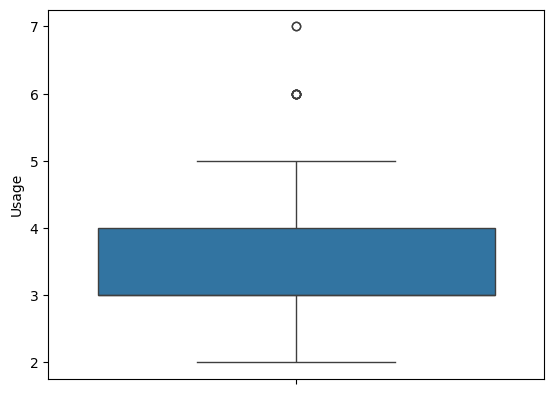

In [ ]:
Usage_boxplot = sns.boxplot(data = fitness_company['Usage'])

By boxploat univariate analysis, we can asses that maximum number of customers use machine in between 3 and 4 times a week. Customers who use 6 or 7 times a week are very few.

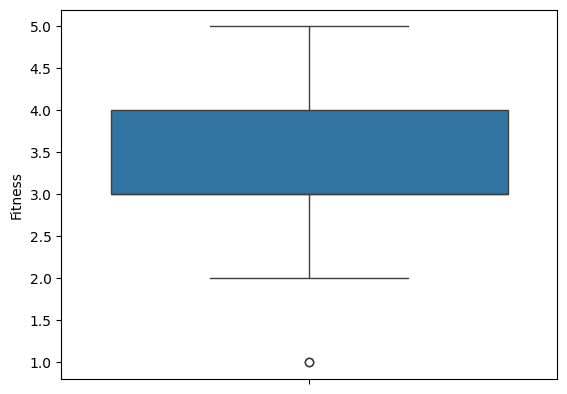

In [ ]:
Fitness_boxplot = sns.boxplot(data = fitness_company['Fitness'])

By boxploat univariate analysis, we can asses that maximum number of customers self rated themselevs as 3-4 and self-rated 1 is very low.

<Axes: ylabel='Income'>

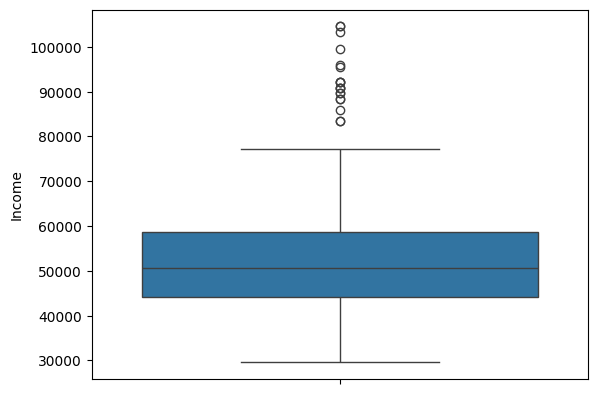

In [ ]:
sns.boxplot(data = fitness_company['Income'])

<Axes: ylabel='Miles'>

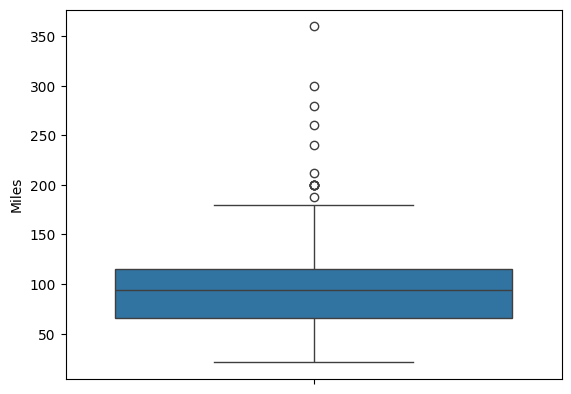

In [ ]:
sns.boxplot(data = fitness_company['Miles'])

In [ ]:
np.min(fitness_company['Miles'])

21

**Min and max incomes of given customers data.**

In [ ]:
min_income = np.min(fitness_company['Income'])
print(min_income)
max_income = np.max(fitness_company['Income'])
print(max_income)

29562
104581


<Axes: xlabel='Income', ylabel='Count'>

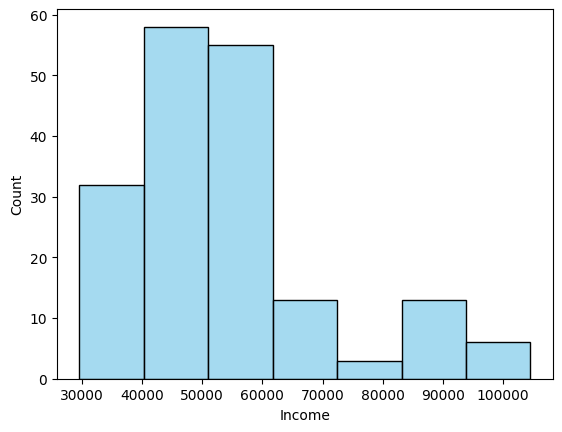

In [ ]:
sns.histplot(data = fitness_company['Income'], bins = 7, color = 'skyblue')

In [ ]:
np.max(fitness_company['Miles']),np.min(fitness_company['Miles'])

(360, 21)

<Axes: xlabel='Miles', ylabel='Count'>

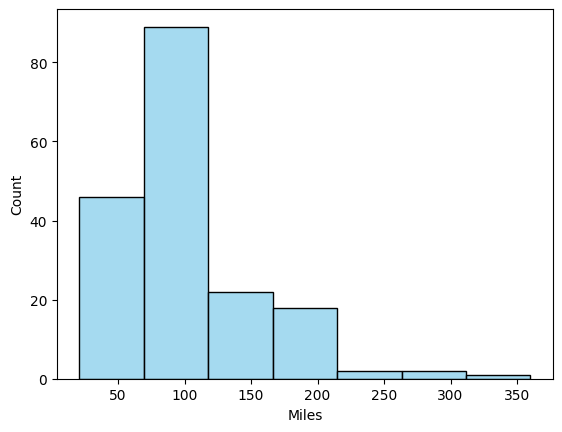

In [ ]:

sns.histplot(data = fitness_company['Miles'], bins = 7, color = 'skyblue')

The KP281 is an entry-level treadmill that sells for $1,500.
The KP481 is for mid-level runners that sell for $1,750.
The KP781 treadmill is having advanced features that sell for $2,500.

In [ ]:
fitness_company.groupby('MaritalStatus')['Product'].count()

,Product
MaritalStatus,
Partnered,107
Single,73


In [ ]:
fitness_company.groupby('Age')['Product'].count()

,Product
Age,
18,1
19,4
20,5
21,7
22,7
23,18
24,12
25,25
26,12


<Axes: xlabel='Age', ylabel='Count'>

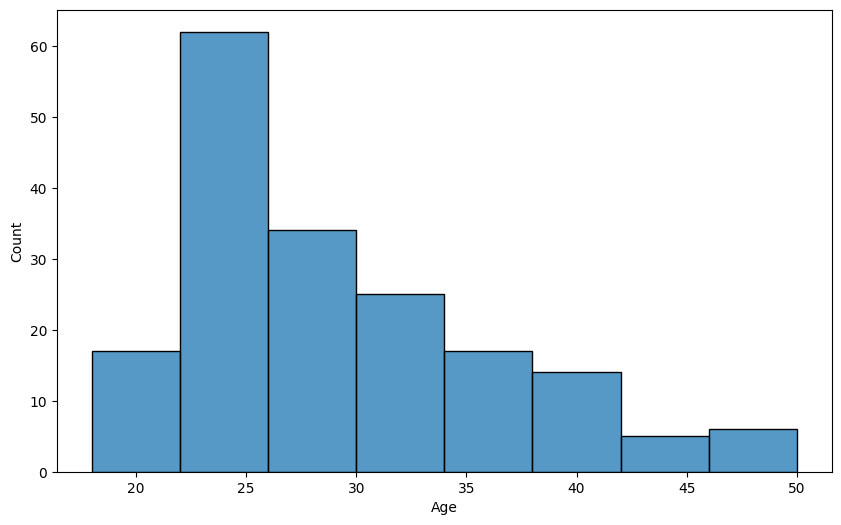

In [ ]:
bin_width = (50 - 18) / 8
bin_edges = np.arange(18, 51, bin_width)
plt.figure(figsize=(10, 6))
# sns.histplot(ages, bins=bin_edges, kde=False, color='skyblue')
sns.histplot(data = fitness_company['Age'],bins = bin_edges)

In [ ]:
numerical_fitness_company = fitness_company.select_dtypes(include=np.number)
correlation_matrix = numerical_fitness_company.corr()
display(correlation_matrix)

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


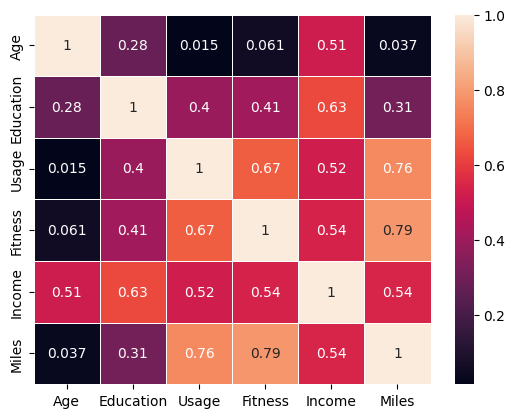

In [ ]:
numerical_fitness_company = fitness_company.select_dtypes(include=np.number)
sns.heatmap(numerical_fitness_company.corr(), annot = True, linewidth = .5)
plt.show()



1.   The correaltion coefficient between age and miles is very less which indicates that people with less or younger age have run a lot of miles.
2.   Customers with decent income maintaning correlation with allother columns equally.

3. Usage,fitness and miles always go hand in hand.
4. Customers with more years of education has less usage, miles and fitness that's might be because of their busy schedule.





**Conditional probalities**

In [ ]:
pd.crosstab(index = fitness_company['Gender'], columns = fitness_company['Product'],normalize='index')

Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308




1.   Almost half of females use KP281 and a very few use KP781.
2.   In male customers case, all types are almost equally purchased.



In [ ]:
pd.crosstab( index = fitness_company['MaritalStatus'],columns = fitness_company['Product'], normalize='index')

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,0.448598,0.336449,0.214953
Single,0.438356,0.328767,0.232877


Whatever may be the marital status of a customer, number of customers buying different types of machines are literally almost same.

In [ ]:
pd.crosstab( index = fitness_company['Usage'],columns = fitness_company['Product'], normalize='index')

Product,KP281,KP481,KP781
Usage,,,
2,0.575758,0.424242,0.000000
3,0.536232,0.449275,0.014493
4,0.423077,0.230769,0.346154
5,0.117647,0.176471,0.705882
6,0.000000,0.000000,1.000000
7,0.000000,0.000000,1.000000




1.   Customers who use machines regularly atleast 5times a week prefer always prefer to buy KP781 because it has a lot of advanced features.
2.   Customers who uses 2-3 times a week prefer to buy either KP281 or KP481.



In [ ]:
pd.crosstab(index = fitness_company['Fitness'], columns = fitness_company['Product'], normalize='index')

Product,KP281,KP481,KP781
Fitness,,,
1,0.500000,0.500000,0.000000
2,0.538462,0.461538,0.000000
3,0.556701,0.402062,0.041237
4,0.375000,0.333333,0.291667
5,0.064516,0.000000,0.935484




1.  Customers with fitness rating as 5 prefer to buy KP781.
2.  Customers with low fitness rating prefer to buy either KP281 or KP481.



**Recommendations**:
From the above insights, we can asses that people with fitness rating 4 is showing less interest in buying KP781 compare to other types. We can target these customers encouraging them to buy KP781.

In [ ]:
age_groups = pd.cut(fitness_company['Age'], bins= [18,26,34,42,50])
pd.crosstab(index = age_groups, columns = fitness_company['Product'], normalize='index')

Product,KP281,KP481,KP781
Age,,,
"(18, 26]",0.444444,0.344444,0.211111
"(26, 34]",0.415094,0.320755,0.264151
"(34, 42]",0.461538,0.384615,0.153846
"(42, 50]",0.500000,0.200000,0.300000


  

1.   Whatever may be the age group, number of customers purchaisng follow the sequence as KP281>KP481>KP781
2.   People with age group of 42-50, has shown more interest in purchasing KP781 compare to other age groups.



In [ ]:
Income_groups = pd.cut(fitness_company['Income'], bins= [29000,48000,67000,86000,105000])
pd.crosstab(index = Income_groups, columns = fitness_company['Product'], normalize='index')

Product,KP281,KP481,KP781
Income,,,
"(29000, 48000]",0.630137,0.369863,0.000000
"(48000, 67000]",0.400000,0.400000,0.200000
"(67000, 86000]",0.181818,0.090909,0.727273
"(86000, 105000]",0.000000,0.000000,1.000000




1.   Customers with the highest salary range, always prefer KP781
2.   Customers with the lowest salary range, may prefer KP481 or KP281.



<Axes: xlabel='Income', ylabel='Miles'>

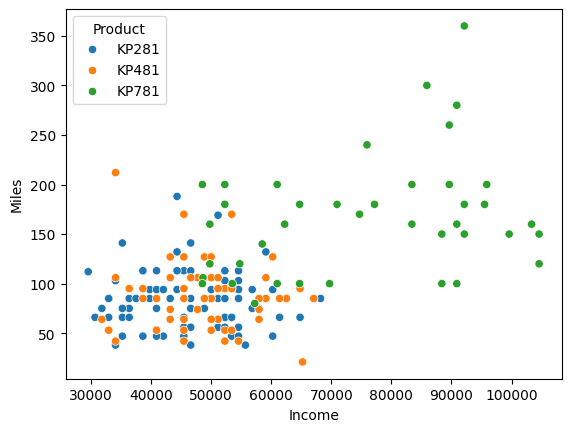

In [ ]:
sns.scatterplot( data = fitness_company, x = 'Income', y = 'Miles', hue = 'Product' )



1.   Customers with lowest salary range, runs less miles per week on tredmill than with the highest salary range.
2.   Customers with the highest salary range, prefer KP781 tredmill and also runs more miles on a tredmill.



<Axes: xlabel='Income', ylabel='Usage'>

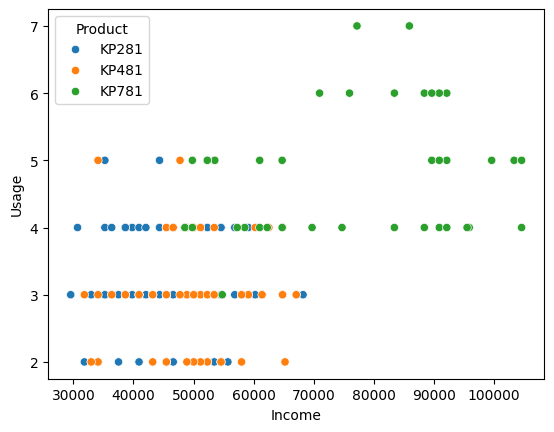

In [ ]:
sns.scatterplot(data = fitness_company, x = 'Income', y = 'Usage', hue = 'Product' )



*  Customers with the highest salary, uses more number of days in a week compare to low salary customers.




<Axes: xlabel='Income', ylabel='Fitness'>

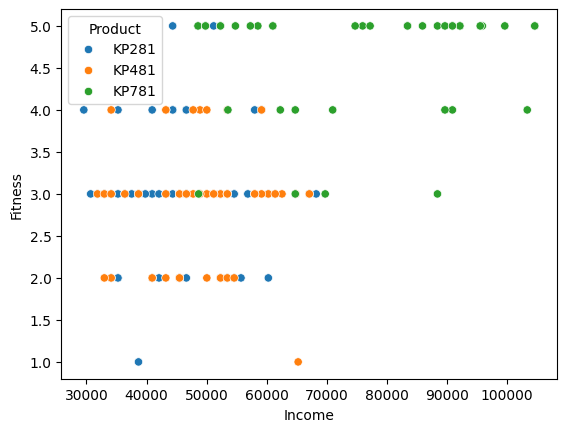

In [ ]:
sns.scatterplot(data = fitness_company, x = 'Income', y = 'Fitness', hue = 'Product' )

<Axes: xlabel='Income', ylabel='Miles'>

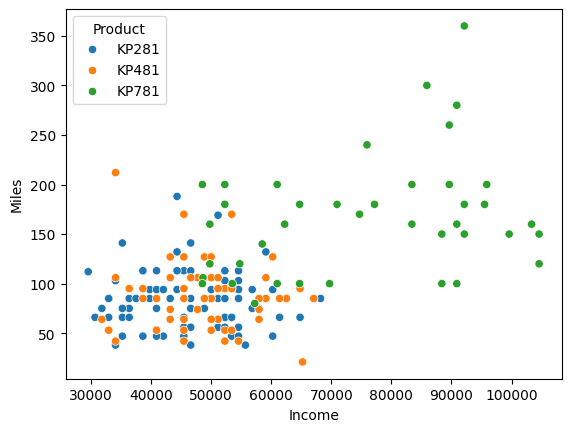

In [ ]:
sns.scatterplot(data = fitness_company, x = 'Income', y = 'Miles', hue = 'Product' )

<Axes: xlabel='Age', ylabel='Usage'>

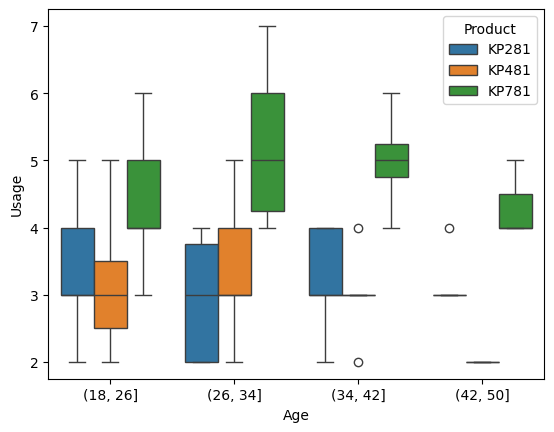

In [ ]:
sns.boxplot(data = fitness_company, x = age_groups, y = 'Usage', hue = 'Product' )


**Customers who prefer KP281 tredmill and KP481 tredmill:**


1.   Salary Range: approx $29000 to $70000
2.   Less usage per week.
3.   Average or below average fitness rating.
4.   Average number of miles per week range from 50-150.
5.   Age in between 18-40.













**Customers who prefer KP781 tredmill:**

1.   Salary Range: approx $50000 to $100000
2.   More usage per week.
3.   Average or above average fitness rating.
4.   Average number of miles per week range from 150-300.
5.   All age group people but with more usage,salary etc.



